Using a stacked bar graph, one can notice that there are more cheap houses in Washington state, and more expensive houses in California. In Oregon, most homes are priced mid-range, between 400k-600k dollars. This could provide useful information for real estate investors to strategize in what regions of the U.S. they should allocate their portfolio shares to maximize yield. 

/tmp/ipykernel_7612/996903023.py:29: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  .query("period_end == '2021-08-01'").pivot_table(index="price_range",


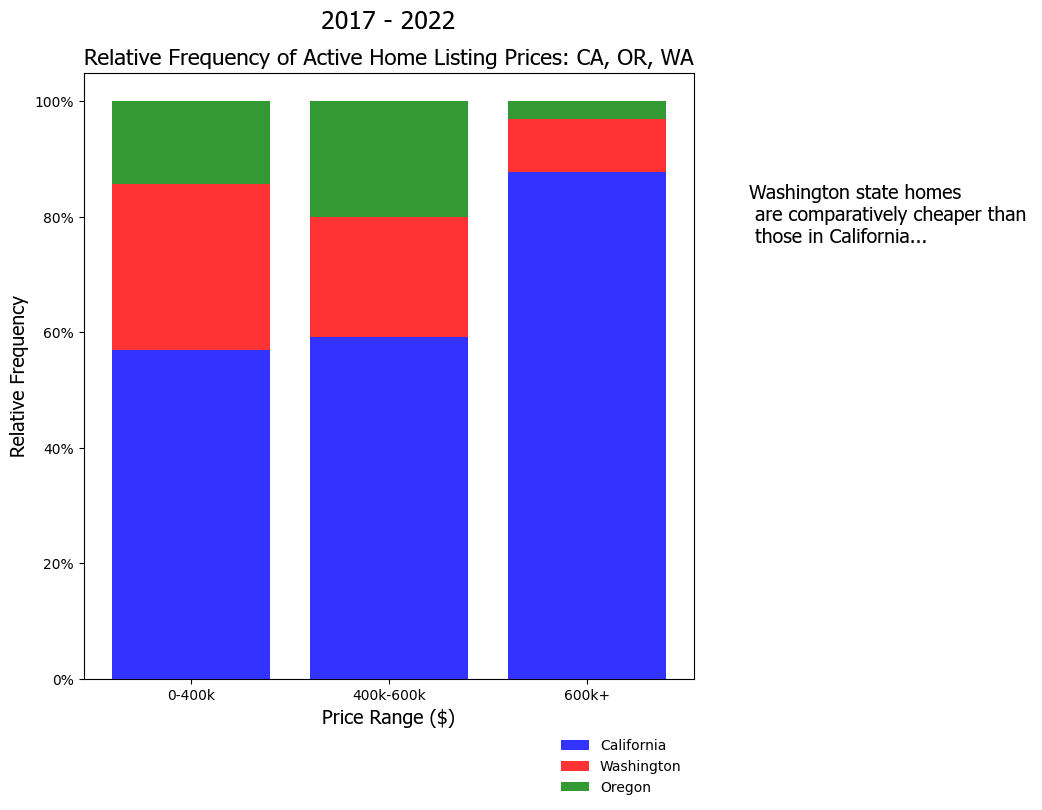

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32", "inventory":"Int32", "active_listings":"Int32", "region_name":"category"}
)

ca_or = (
    housing_raw
        .loc[housing_raw["region_name"].str[-2:].astype(str).isin(["CA", "WA", "OR"])]
        )

ca_or = (
    ca_or
        .assign(price_range = pd.cut(
            ca_or.loc[:, "median_active_list_price"],
            [0, 400000, 600000, 2000000],
            labels = ["0-400k", "400k-600k", "600k+"]),
    state = ca_or["region_name"].str[-2:]
   )
)

ca_or = (
    ca_or
        .query("period_end == '2021-08-01'").pivot_table(index="price_range",
            columns = "state",
            values = "inventory",
            aggfunc="sum",
            observed=False)
)

ca_or = (
    ca_or
        .apply(lambda x: x*100 / sum(x), axis = 1)
)

def cm_to_inches(cm):
    return cm / 2.54

fig, ax = plt.subplots(figsize = (cm_to_inches(20),cm_to_inches(20)))

ax.bar(ca_or.index,
       ca_or["CA"], 
       color="blue",
       alpha=0.8,
       label="California"
      )

ax.bar(ca_or.index,
       ca_or["WA"],
       color="red",
       label="Washington",
       alpha=0.8,
       bottom = ca_or["CA"]
      )
      
ax.bar(ca_or.index,
       ca_or["OR"],
       color="green",
       label="Oregon",
       alpha=0.8,
       bottom = ca_or["CA"] + ca_or["WA"]
      )

fig.legend(
    bbox_to_anchor=(0.9,0.05),
    frameon=False)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("Relative Frequency of Active Home Listing Prices: CA, OR, WA",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Price Range ($)",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_ylabel("Relative Frequency",
    fontsize=14,
    fontname="Tahoma"
            )

ax.text(1.09,0.72,
    "Washington state homes \n are comparatively cheaper than \n those in California...",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.show()

The grouped bar graph below illustrates how in Washington state and Oregon, there is an inverse association between how expensive a house is listed for and its months of supply: the more expensive the house, the quicker it sells out for. In California, the houses that took the longest to sell for were mid-range priced houses. (400k-600k dollars) This could potentially be due to a lower buyer pool and decreased competition for luxury properties from these states, where buyers are less likely to wait for cheaper offers from other undercutting suppliers. 

/tmp/ipykernel_7612/3551575997.py:28: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  .query("period_end == '2021-08-01'").pivot_table(index="price_range",


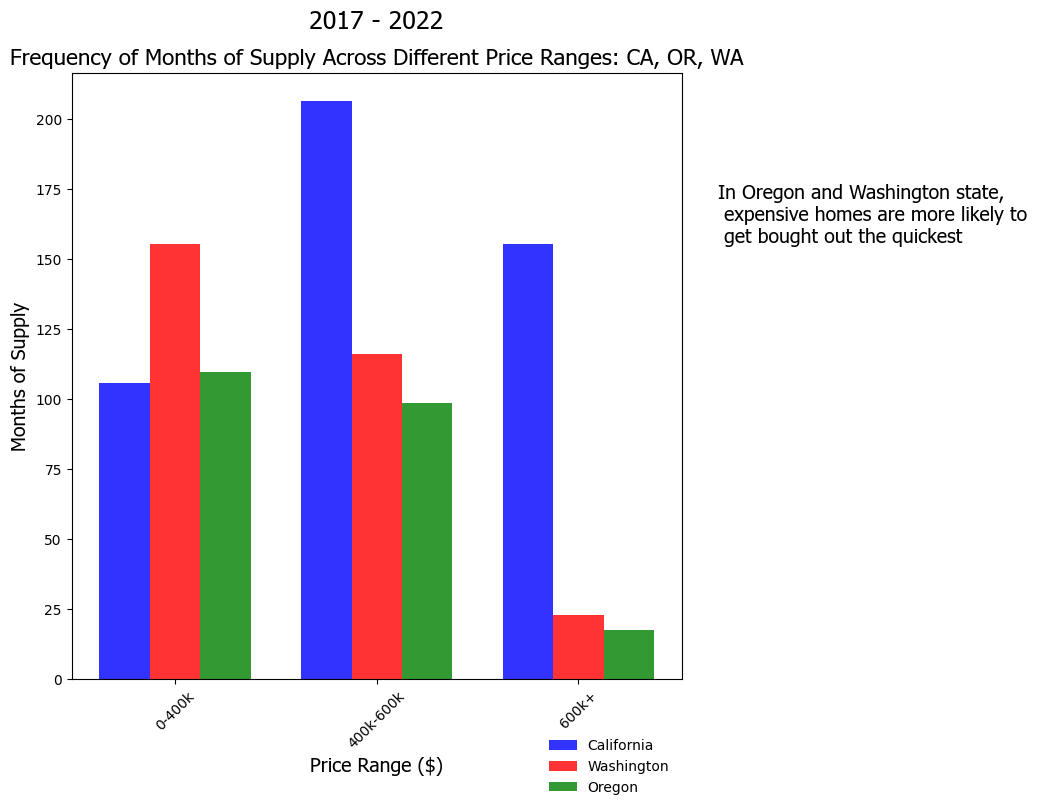

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32", "inventory":"Int32", "active_listings":"Int32", "region_name":"category"}
)

ca_or = (
    housing_raw
        .loc[housing_raw["region_name"].str[-2:].astype(str).isin(["CA", "WA", "OR"])]
        )

ca_or = (
    ca_or
        .assign(price_range = pd.cut(
            ca_or.loc[:, "median_active_list_price"],
            [0, 400000, 600000, 2000000],
            labels = ["0-400k", "400k-600k", "600k+"]),
    state = ca_or["region_name"].str[-2:]
   )
)

ca_or = (
    ca_or
        .query("period_end == '2021-08-01'").pivot_table(index="price_range",
            columns = "state",
            values = "months_of_supply",
            aggfunc="sum",
            observed=False)
)

def cm_to_inches(cm):
    return cm / 2.54

fig, ax = plt.subplots(figsize = (cm_to_inches(20),cm_to_inches(20)))

width = 0.25

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x+ width for x in x2]

ax.bar(x1,
       ca_or["CA"], 
       color="blue",
       alpha=0.8,
       label="California",
       width=width
      )

ax.bar(x2,
       ca_or["WA"],
       color="red",
       label="Washington",
       alpha=0.8,
       width=width
      )
      
ax.bar(x3,
       ca_or["OR"],
       color="green",
       label="Oregon",
       alpha=0.8,
       width=width
      )

fig.legend(
    bbox_to_anchor=(0.9,0.05),
    frameon=False)
fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("Frequency of Months of Supply Across Different Price Ranges: CA, OR, WA",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Price Range ($)",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_ylabel("Months of Supply",
    fontsize=14,
    fontname="Tahoma"
            )

ax.text(1.06,0.72,
    "In Oregon and Washington state, \n expensive homes are more likely to \n get bought out the quickest",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.xticks(x2,
    ca_or.index,
    rotation=45)

plt.show()

Compared to the Central Valley and the Bay Area, more homes are sold in Southern California, and in particular in Los Angeles county. Fresno county sees the least amount of homes being sold out of the ten counties represented. Again, geospatial analysis can prove useful for real estate firms to strategically increase sale prices when demand is hot. 

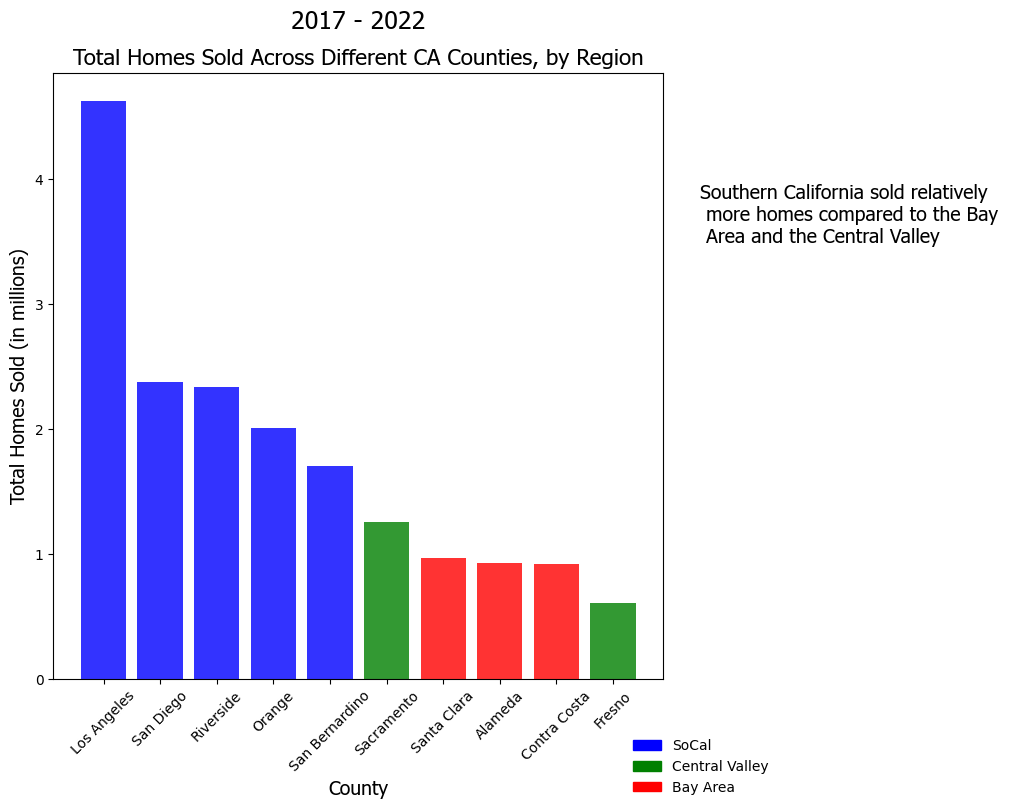

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
        .set_index("period_begin").sort_index()
)

ca_homes_sold = (
    ca_housing
        .groupby("region_name")
        .agg({"total_homes_sold":"sum"})
        .sort_values("total_homes_sold", ascending = False)
        .iloc[:10]
)

def cm_to_inches(cm):
    return cm / 2.54

colors = ["blue",
          "blue",
          "blue",
          "blue",
          "blue",
          "green",
          "red",
          "red",
          "red",
          "green"]

fig, ax = plt.subplots(figsize = (cm_to_inches(20),cm_to_inches(20)))

ax.bar(x=ca_homes_sold.index,
       height=ca_homes_sold["total_homes_sold"]/1000000, 
       color=colors,
       alpha=0.8
      )
ax.xaxis.set_tick_params(rotation=45)

socal = mpatches.Patch(color = 'blue', label = 'SoCal')
central = mpatches.Patch(color = 'green', label = 'Central Valley')
bay = mpatches.Patch(color = 'red', label = 'Bay Area')

fig.legend(handles=[socal,central,bay],
    bbox_to_anchor=(1.05,0.05),
    frameon=False)
fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("Total Homes Sold Across Different CA Counties, by Region",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("County",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_ylabel("Total Homes Sold (in millions)",
    fontsize=14,
    fontname="Tahoma"
            )
ax.text(1.06,0.72,
    "Southern California sold relatively \n more homes compared to the Bay \n Area and the Central Valley",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.show()

Contrary to the results of the previous graph though, across three major California cities—San Francisco, San Diego, and Los Angeles—San Francisco saw the highest share of homes sold out of the total amount of homes sold by these three cities: proving San Francisco to be a primary driver of profit and commerce to the Bay Area region.

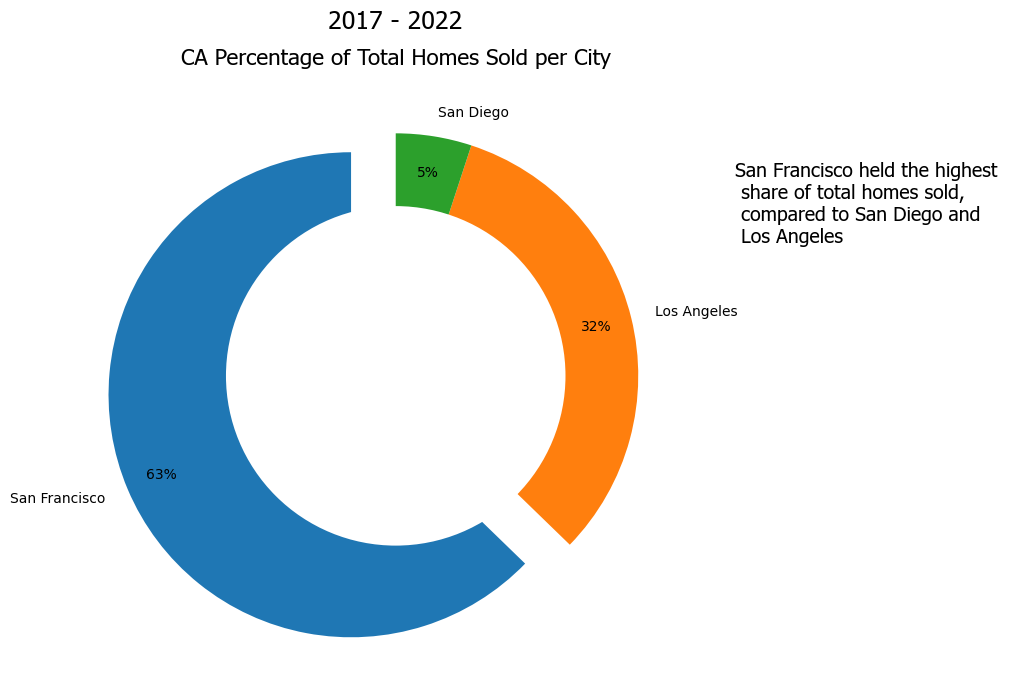

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
        .set_index("period_begin").sort_index()
)

ca_homes_sold = (
    ca_housing
        .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
        .groupby("region_name")
        .agg({"total_homes_sold":"sum"})
)

def cm_to_inches(cm):
    return cm / 2.54

fig, ax = plt.subplots(figsize = (cm_to_inches(20),cm_to_inches(20)))

ax.pie(x=ca_homes_sold["total_homes_sold"],
    startangle=90,
    labels=["San Francisco","Los Angeles","San Diego"],autopct="%.0f%%",
    explode=(0.2,0,0),
    pctdistance=0.85
)

fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("CA Percentage of Total Homes Sold per City",
    fontsize=16,
    fontname="Tahoma"
            )

hole = plt.Circle((0,0),0.7,fc="white")
fig = plt.gcf()

plt.gca().add_artist(hole)

ax.text(1.06,0.72,
    "San Francisco held the highest \n share of total homes sold, \n compared to San Diego and \n Los Angeles",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.show()